In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(13)

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.77, shuffle=True)

In [5]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

In [6]:
def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1)  #добавим условие для того, чтобы значение под логарифмом не обратилось в 0
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
m, n = X_train.shape
w = np.zeros(n)
b = 0

In [8]:
learning_rate = 0.001
lmbda = 0.0001
max_iter = 10_000

In [9]:
loss0 = None
loss1 = None
loss_lst = []
iter = 0

while True:
    z = np.dot(X_train, w) + b
    a = sigmoid(z)

    dw = (1 / m) * np.dot(X_train.T, (a - y_train))
    db = (1 / m) * np.sum(a - y_train)

    w -= learning_rate * dw
    b -= learning_rate * db
    
    loss1 = log_loss(y_train, a)
    loss_lst.append(loss1)
    
    if loss0 is not None and abs(loss1 - loss0) < lmbda:
        break

    loss0 = loss1
    if iter >= max_iter:
        break
    iter += 1

In [10]:
z_test = np.dot(X_test, w) + b
a_test = sigmoid(z_test)
predictions = (a_test >= 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f'Метрика аccuracy: {accuracy * 100:.2f}%')

Метрика аccuracy: 86.96%


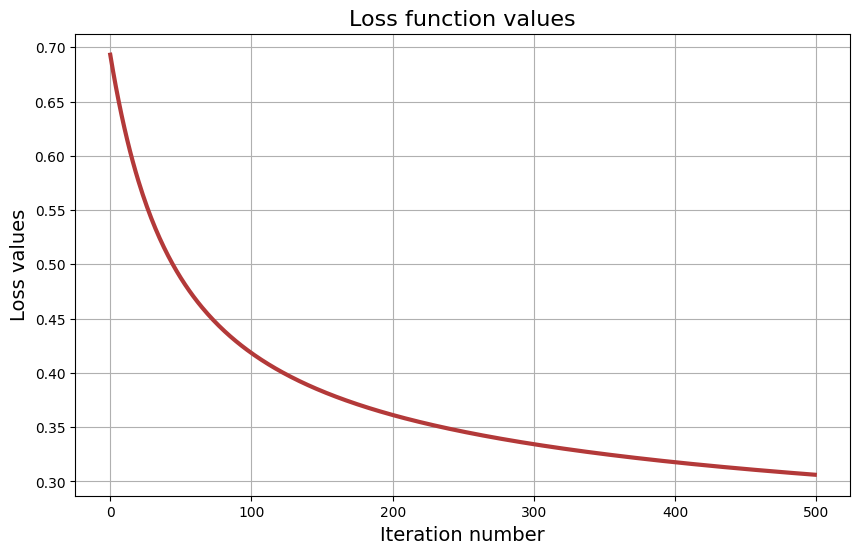

In [11]:
# нарисуем график значений функции потерь на итерациях
plt.figure(figsize=(10, 6))
plt.plot(loss_lst, color='#b33939', linewidth=3)
plt.title('Loss function values', fontsize=16)
plt.xlabel('Iteration number', fontsize=14)
plt.ylabel('Loss values', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
iter

499